# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** The smartcab does not move at all. (Given it doesn't know how to drive yet, this arguably is in fact 'smart' or at least the safest course of action since pulling to the side isn't an option! But they won't learn much). The driving agent receives positive rewards for each period when it is sitting at a red light, as not moving is the right thing to do in this situation. However, when the light is green the driving agent receives a negative reward of varying amounts each period.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:** 

** agent.py flags:**  
* verbose: governs whether or not additional output is included in the text printout during simulation that may be useful during debugging.
* enforce_deadline: governs whether or not the learning agent has a limited or unlimited amount of time to reach the goal.
* log_metrics: determines whether or not the trial and simulation results are saved to a file in the logs folder.

** environment.py: **
When the agent performs an action the Environment class function act() is called. It requires 3 inputs: self, agent, action. It assesses the validity of the intended action and gives the agent rewards or penalties depending on the outcome of that action (eg an accident, or a traffic rule violation, or if a valid move, a change in location). It also assesses whether the learning agent reached the goal with that action and stops the simulation if so.

** simulator.py: **
The render() function provides the main graphical interface output of the simulation using pygame, including text information telling the observer what the learning agent did (or attempted to do) and the reward/penalty outcomes of that action (and why). The render_text() function gives essentially the same information but does not attempt the graphical representation. This mode is helpful for people who cannot get pygame to work on their computer.

** planner.py **
The next_waypoint() function considers first whether the destination is East or West of the current direction. After making an appropriate adjustment it then considers whether it is North or South of the destination.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


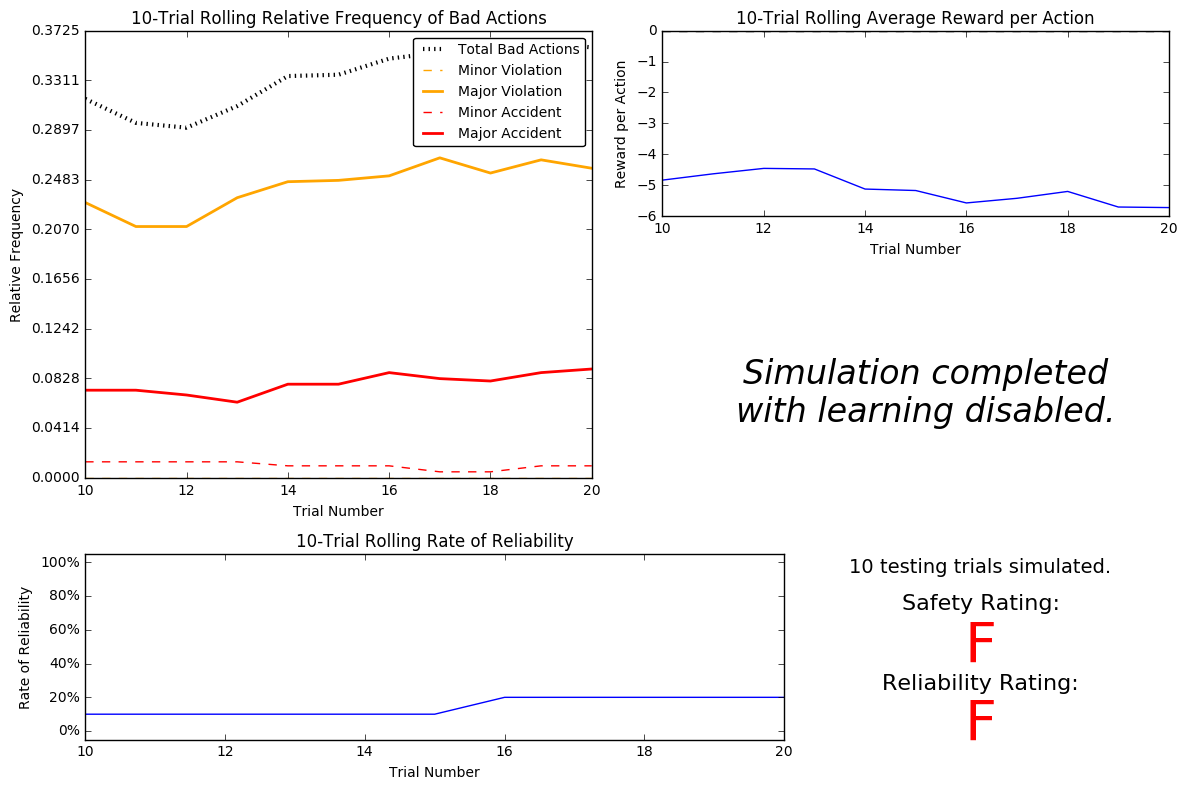

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

* The performance of the car did not improve over time, as one would expect in an agent without learning. There is some random variation in the safety and reliability but it would be highly misleading to say for example that "reliability doubled" over the trials - 20% is still a very bad result and the result is just random.
* The Smartcab would not be considered safe or reliable; indeed it received a rating of F for both. It very seldom reached the goal (the 10-trial rolling rate of reliability never rose above 20%) and its safety was also pretty dire, with some kind of "bad action" about a third of the time, including a major accident well over 5% of the time, and a "major violation" 20-25% of the time on average. Given the agent is driving randomly, this bad performance makes perfect sense.
* The agent is (appropriately) primarily receiving negative rewards for its actions, with an average of around -5.5 over the 20 trials. While the numbers have no "real-life" interpretation, the sign indicates a bad performance, and it provides a useful benchmark for the progress that is later made when learning is implemented.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:** 

* The feature most relevant to _efficiency_ is 'waypoint'. Using this we can ensure the Smartcab doesn't waste time (actions) heading in the wrong direction.
* The features most relevant to _safety_ are 'light' (so we don't run red lights or idle unnecessary at green lights), and whether there is a car on the 'left', and if so, what it intends to do, as this will determine whether or not it is safe to proceed with a right turn through a red light. 
* Whether there is a car on the right or oncoming (and if so, what that car intends to do) affects whether there is an accident in the case of an incorrect action but does not not actually affect the agent's optimal decision. (It is stated in the code that if the agent is turning left and an oncoming car is coming forward, it is assumed the learning agent will wait until the lane is clear).
* 'deadline' is not appropriate for modeling the smartcab's actions in most steps. Depending on how the learning is set up, the smartcab could learn that it is "worth it" to commit a violation and take the penalty if this is more than compensated for by the reward for making it to the destination in time when it wouldn't have otherwise. However, the program is set up such that getting to the goal or otherwise is counted in a completely different metric ('success') to the safety and efficiency of the driving ('rewards'). This is appropriate. It would be commercially unwise (not to mention unethical) to set up a learning process that trades off safety with being on time - safety should always be paramount. Having this feature would also unnecessarily expand the state space.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** There are 3 features. 'Waypoint' has 3 values (left, right, forward). The variables describing the intended direction of the car coming from the left (if any), has 4 values (None, left, right, forward). The traffic light has 2 values, red and green. The size of the state space is therefore 3x4x2=24, which should be very manageable.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

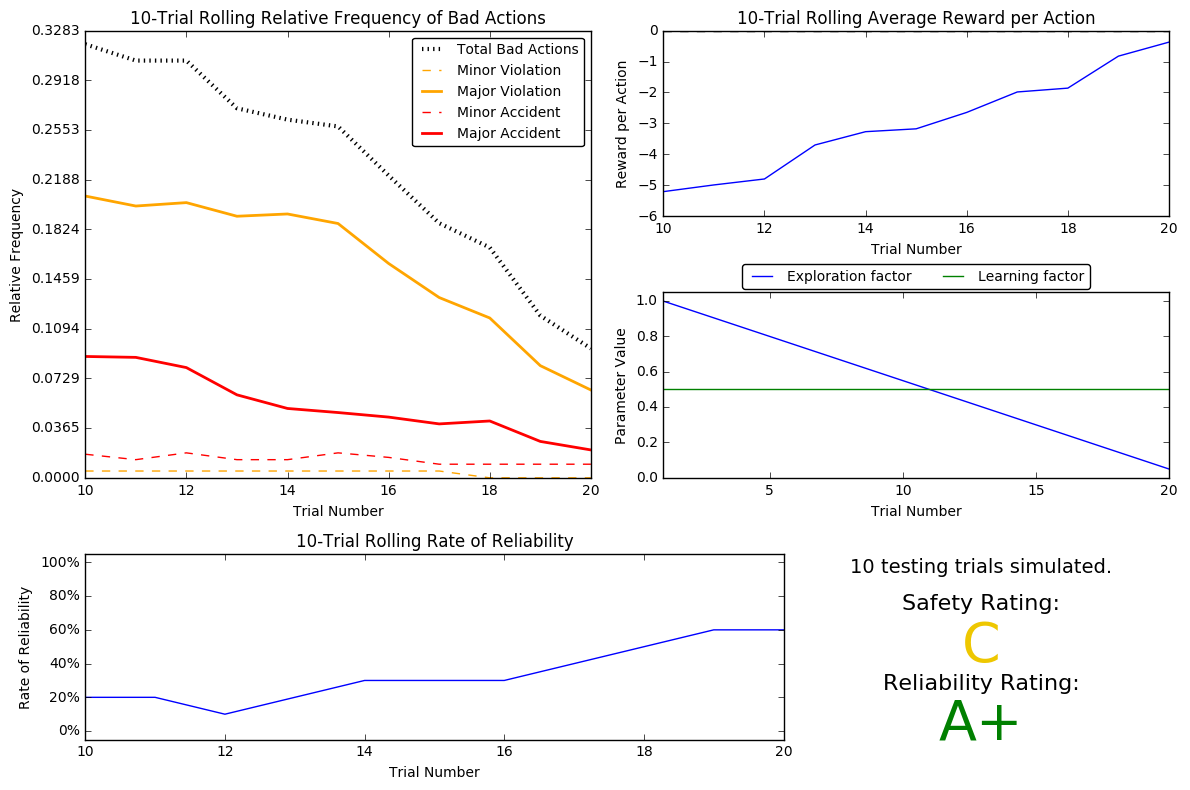

In [48]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
* The agent made fewer bad decisions as trials continued, confirming it was indeed learning. The 10-trial relative frequency of bad actions declined from over 30% to about 10% (still unacceptably high). The rate of major accidents fell from about 9% to 2%, but again, this is nowhere near an acceptable rate. In testing, the agent received a safety rating of C (though different simulations revealed a lot of randomness in this grade).
* The reliability rate improved over the trials significantly, from about 20% at the start to around 60%. The agent  received an A+ grade for reliability in the testing phase but there may be an element of luck at play.
* The 10-trial rolling reward per action improved from around -5 to about -0.4 over the 20 trials - a marked improvement, but still negative, illustrating that the agent is still making bad decisions on average.
* Examination of the Q-table shows that most state-action combinations were explored (non-zero Q-values). 
* To improve this result more trials would probably help. Tweaking the learning (alpha) and exploration (epsilon) rates to best exploit this trade-off should also assist. For example, epsilon should drop fast at the beginning. It is true that early on there isn't much learning to exploit, suggesting a high epsilon is appropriate, but the zero-initialised Q-values imply that to start with there will be lots of ties and hence random choices in any case, even when we fall into the (1-epsilon) basket.


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

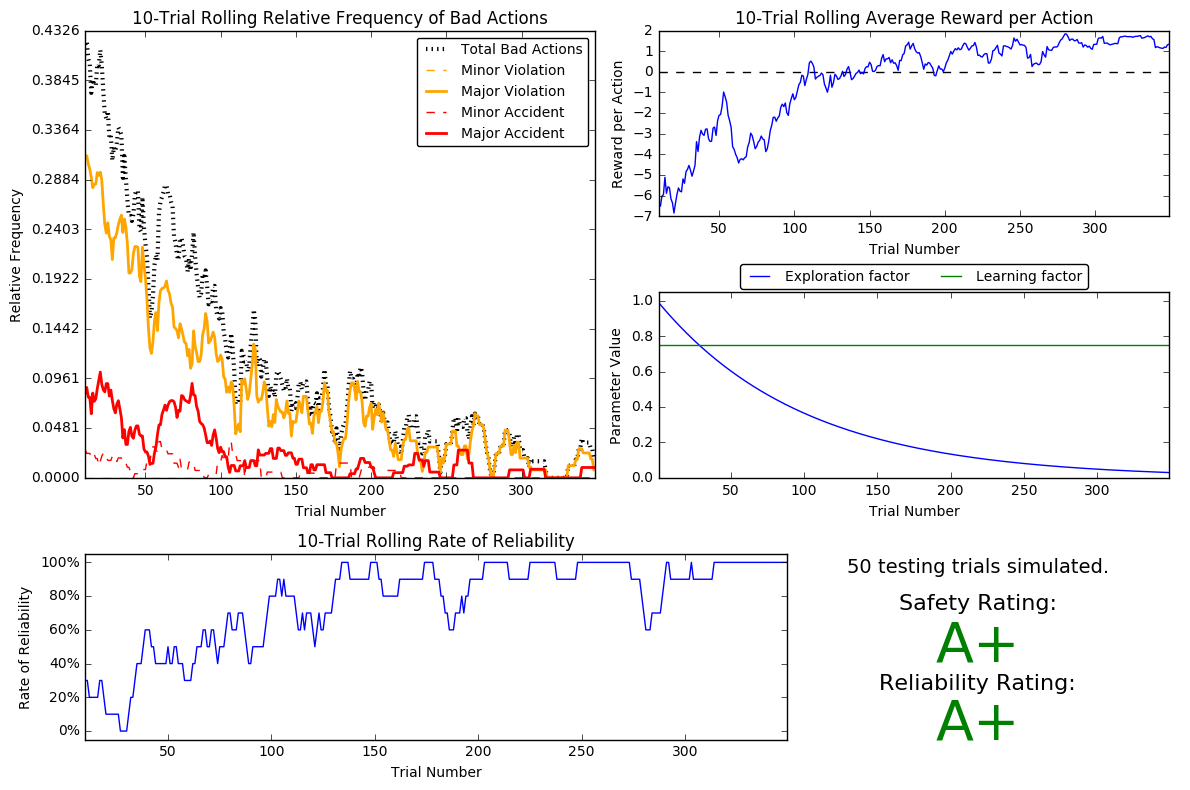

In [55]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** Final model: alpha = 0.75, epsilon = 0.99^t, tolerance = 0.03 (~350 learning trials), n_test = 50

* _Number of tests:_ I decided that, despite the unforgiving nature of the grading, 10 tests are not really sufficient to accurately gauge safety. Testing should intuitively be more rigorous. **I therefore increased the number of test runs to 50.** The Smartcab of course requires considerably more training to excel with this tougher threshold, given the safety rating depends on the number, not the proportion, of incidents.

* _alpha (learning rate):_ The rewards are stochastic, but not to the degree that it was necessary to have the learning rate decline over time. Indeed, in the case where the rewards environment is entirely deterministic,  alpha = 1 is optimal. In this study the rewards do have a stochastic component and will be different on different occasions for the same state-action pairings, due to both a random initialisation and the fact they are a function of the time remaining. However, it is still the case that the best action in a given state will be the best action the next time the agent is in that state too. Therefore a fairly high alpha seems likely to be optimal. **I chose 0.75**. (I did experiment with alpha as high as 0.99 but discovered it then occasionally learned the suboptimal policy.)

* _epsilon (the exploration factor):_  My initial thought was that I didn't want the exploration factor to decline as quickly as it did in the suggested functions, because at the start there is very little learning to exploit. So I made up a function (1-a).t^2, which declines slowly initially and then quickly at the end. However, I quickly realised (looking at my results and thinking about the code more carefully) that 100\*(1-epsilon) percent of the time the choice of action will actually often also be random at the start, since the Q-values are all initialised to 0. So I went back to the suggested functions. **I found 0.99^t plus epsilon_tolerance of 0.03 resulted in what seemed like a robust number of trials for complete learning, erring on the side of caution while keeping training time reasonable (about 350 trials).** Examination of the Q-tables confirmed most state-action pairs were fully populated (the only occasional zero values were for the action None, and in these cases there was always a positive Q-value elsewhere). This means the agent was never making uninformed decisions.

* _Relative goal performance:_ Trial and error quickly revealed that it was far easier to get a good score for reliability than safety. I discovered from the code that a single major accident will trigger an F rating, which seemed fair in a real-world interpretation. 

* In the  50 tests, **the agent achieved a reliability rating of A+ and a safety rating of A+.** At this point, ** I concluded the learning was sufficient.**

* _Degree of improvement:_ The optimised agent improved considerably on the initial learning agent (and of course the non-learning benchmark). ** Safety improved from C to A+. Reliability remained at A+, but the new result is far more robust**, as evidenced by the fact that the 10-trial rolling reliability at the end of the non-optimised learning was only around 60%, versus 100% for the optimised learner (admittedly with many more trials).

* _Success or otherwise of learning:_ ** The agent's performance clearly improved over the trials**, though the built-in exploratory randomness ensured that this was not in a linear fashion. The agent reached the goal more often, caused fewer bad events, and quickly moved to receiving positive rewards on average.

* _Is the learning agent safe? Is it reliable?_ The Smartcab received an A+ grading on both of these fronts, so assuming the grading scheme is appropriate, then **yes.**

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

**1. Optimal policy **

The optimal policy for the Smartcab can be described as a decision tree/flow chart.

* Is the light red? 
* If yes, is a) the waypoint 'right' and b) is there no car coming from the left intending to go straight (ie *not* 'left': 'forward')? If a) AND b), the optional action = right. Otherwise the optimal action = None. End.
* If no: (ie, the remainder of the instuctions assume the light is green):
* Is the waypoint 'forward'? If so, the optimal action = 'forward'. End.
* Is the waypoint 'right'? If so, the optimal action = 'right'. End.
* Is the waypoint 'left'? If yes, the optimal action = 'left'. End. (from environment.py: "We assume the cab will wait for the lane to be clear on a green light, before taking the left turn."

Thus we can see that the relevant inputs are waypoint, light (red/green), and left (forward/other). Whether there is a car on the right or oncoming and what that car intends to do affects whether there is an accident and hence the penalty in the case of an incorrect action, but does not not actually affect the agent's optimal decision.

Note that this policy does not take into account advanced tactics such as avoiding left turns which often incur a wasted 'None' move when traffic is heavy - ie recognising that the shortest route may not be the quickest.

** 2. Has my agent learned the optimal policy? **

My state variable is defined as (waypoint, left vehicle intention (if any), traffic light colour).

Examination of the Q-tables reveals the following results, showing the agent has learned the optimal policy for all but one state. ###################### In the case where the waypoint says forward, there is a car coming from the left that's going right, and the traffic light is green, the agent has learned to turn right rather than follow the waypoint forward.

| Waypoint | Left    | Light | Optimal policy | Learned optimal policy |
|----------|---------|-------|----------------|------------------------|
| left     | left    | red   | none           | none                   |
| left     | left    | green | left           | left                   |
| left     | right   | red   | none           | none                   |
| left     | right   | green | left           | left                   |
| left     | forward | red   | none           | none                   |
| left     | forward | green | left           | left                   |
| left     | none    | red   | none           | none                   |
| left     | none    | green | left           | left                   |
| right    | left    | red   | right          | right                  |
| right    | left    | green | right          | right                  |
| right    | right   | red   | right          | right                  |
| right    | right   | green | right          | right                  |
| right    | forward | red   | none           | none                   |
| right    | forward | green | right          | right                  |
| right    | none    | red   | right          | right                  |
| right    | none    | green | right          | right                  |
| forward  | left    | red   | none           | none                   |
| forward  | left    | green | forward        | forward                |
| forward  | forward | red   | none           | none                   |
| forward  | forward | green | forward        | forward                |
| forward  | right   | red   | none           | **right**              |
| forward  | right   | green | forward        | forward                |
| forward  | none    | red   | none           | none                   |
| forward  | none    | green | forward        | forward                |

**3. Extract from logged Q-table:**

('forward', 'forward', 'red') 
 -- forward : -40.29
 
 -- right : -20.54
 
 -- None : 2.13
 
 -- left : -39.97
 
 _We want to go forward. A car on the left also wants to go forward. The traffic light is red. You can't drive forward when the light is red: the optimal policy is none. This has a positive Q-value. Driving in any direction is a violation, and indeed is likely to result in an accident; hence the large negative Q-values for the other actions._

('forward', 'right', 'red')
 -- forward : -10.70
 
 -- right : 1.44
 
 -- None : 0.00
 
 -- left : -10.60
 
_We want to go forward. The light is red, meaning moving forward or left is a violation. A free turn right is permissable because there is no car coming from the left going straight, to whom we would have to give way. There therefore no penalty for turning right. But it isn't the direction we want to go, so we are better off under this reward system to just wait at the red light. (That said, it isn't clear that None has been explored here.)_ 

('left', 'forward', 'green')
 -- forward : 0.34
 
 -- right : 0.36
 
 -- None : 0.00
 
 -- left : 2.54
 
_The light is green so going in any direction is permissable (the simulation assumes we will give way to oncoming cars going straight before making a left turn). Turning left is the waypoint, so has the highest Q-value._

('forward', 'right', 'red')
 -- forward : -10.70
 
 -- right : 1.44
 
 -- None : 0.00
 
 -- left : -10.60
 
 _ This is the state where the agent has learned a suboptimal policy. The car has correctly learned that going forward or left is a bad idea (running a red light). Turning right or doing nothing are the two actions that will not result in a violation. The optimal policy is do nothing rather than go off course, but the car has learned that turning right is best. This is because the car doesn't follow the waypoint with either action and the reward scheme doesn't distinguish between not making progress towards the waypoint and quite possibly heading in the wrong direction. 'None' was possibly not explored (or resulted in no reward or penalty)._ 
 
Because I ran many trials, very few state-action pairs remained unexplored, which explains why the agent has so often identified the optimal policy. If I had run fewer trials some state-action pairs may well have remained unexplored, which could lead to sub-optimal policy. 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** The Smartcab doesn't know where the goal is - it is just given a waypoint one step at a time. Without knowing the waypoint for potential future steps it can't calculate future rewards. Also, the environment is set up such that reaching the goal does not result in a reward. If it did, as would be required to make future rewards meaningful, then an action state would get a random bump up to one Q-value that wouldn't reasonably be expected to repeat the next time that state-action is performed (the Smartcab is unlikely to happen to be arriving at the goal with exactly that state-action pair the next time around).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.